In [736]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [737]:
file_path = "15min-ETH-s1p1-20250107-TJS191_METUN_SAJAU_1S.csv"

data = pd.read_csv(file_path, header = 1)

# data.to_csv('rmon.csv', index = False)

In [738]:
data

,Time Stamp,RX Octs,TX Octs,RX Pkts,TX Pkts,RX Drop Events,Status,RX Undersize Pkts,Status.1,RX Fragments,...,TX Queue3 Discard,TX Queue4 Discard,TX Queue5 Discard,TX Queue6 Discard,TX Queue7 Discard,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Record Status
0,00:15,9175527480,1514703941,8335349,3524205,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,VALID
1,00:30,6942527191,1068587206,6378407,2801259,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,VALID
2,00:45,7941318350,1010057412,7164876,3122591,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,VALID
3,01:00,7270610327,1027084717,6650565,3131650,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,VALID
4,01:15,6035485150,807984471,5667669,2629199,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,VALID
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,23:00,13579270105,1090338932,11940976,4341167,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,VALID
92,23:15,10833933944,884502230,9787060,3737309,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,VALID
93,23:30,9457482763,889741468,9027555,3737966,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,VALID
94,23:45,7481999301,764318805,6885441,2801036,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,VALID


In [739]:
data.insert(3, "RX Mbps", [0] * len(data))
data.insert(4, "TX Mbps", [0] * len(data))

In [740]:
# data

In [741]:
# Mengubah ke string untuk melakukan pembersihan data
data['RX Octs'] = data['RX Octs'].astype(str)
data['TX Octs'] = data['TX Octs'].astype(str)

In [742]:
# data['RX Octs'] = data['RX Octs'].str.replace('*', '', regex=False)  # Hapus karakter '*'
# data['TX Octs'] = data['TX Octs'].str.replace('*', '', regex=False)  # Hapus karakter '*'

# Periksa apakah kolom 'RX Octs' atau 'TX Octs' mengandung karakter '*'
if data['RX Octs'].str.contains(r'\*').any() or data['TX Octs'].str.contains(r'\*').any():
    # Hapus karakter '*' jika ditemukan
    data['RX Octs'] = data['RX Octs'].str.replace('*', '', regex=False)
    data['TX Octs'] = data['TX Octs'].str.replace('*', '', regex=False)
    print("Karakter '*' telah dihapus dari kolom RX Octs dan TX Octs.")
else:
    print("Tidak ada karakter '*' pada kolom RX Octs dan TX Octs. Lanjutkan.")


Tidak ada karakter '*' pada kolom RX Octs dan TX Octs. Lanjutkan.


In [743]:
# data['Time Stamp'] = data['Time Stamp'].replace('24:00', '00:00')
# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], format = '%H:%M').dt.time
data['RX Mbps'] = data['RX Mbps'].astype(float)
data['TX Mbps'] = data['TX Mbps'].astype(float)
data['RX Octs'] = data['RX Octs'].astype(float)
data['TX Octs'] = data['TX Octs'].astype(float)


In [744]:
# data.tail()

In [745]:
# data.dtypes


In [746]:
data['RX Mbps'] = (data['RX Octs'] * 8)/(60*15)/1000000
data['TX Mbps'] = (data['TX Octs'] * 8)/(60*15)/1000000

In [747]:
# data

In [748]:
# data['Time Stamp'] = data['Time Stamp'].replace('24:00', '00:00')
# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], format = '%H:%M')

# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'])
# data['Time Interval'] = data['Time Stamp'].apply(lambda x: pd.date_range(start=x, periods=2, freq='15min').max())

In [749]:
# data =data.drop(index=95)

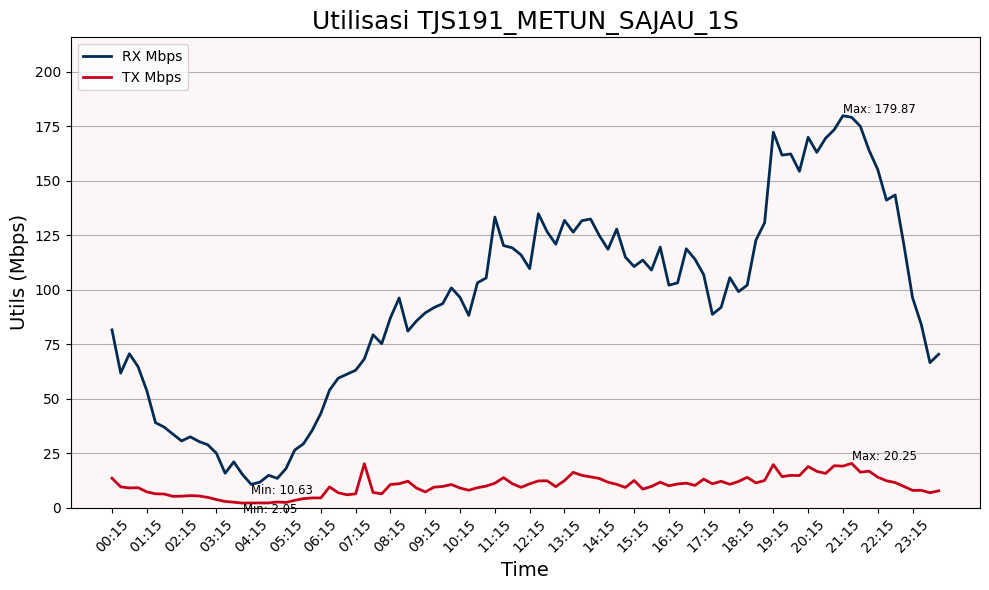

In [750]:
# Membuat grafik garis untuk RX Mbps dan TX Mbps
plt.figure(figsize=(10, 6))
ax = plt.axes()
ax.set_facecolor('#FDF6F6')

# Plot RX Mbps dan TX Mbps
# plt.plot(data.index, data['RX Mbps'], label='RX Mbps', color='blue', marker='o', linestyle='-', linewidth=2)
# plt.plot(data.index, data['TX Mbps'], label='TX Mbps', color='red', marker='o', linestyle='-', linewidth=2)

# Plot RX Mbps dan TX Mbps
plt.plot(data['Time Stamp'], data['RX Mbps'], label='RX Mbps', color='#002C54', linestyle='-', linewidth=2)
plt.plot(data['Time Stamp'], data['TX Mbps'], label='TX Mbps', color='#C5001A', linestyle='-', linewidth=2)

# Menambahkan judul grafik
file_base = os.path.splitext(os.path.basename(file_path))[0]
title_part = file_base.split('-')[4]
plt.title(f"Utilisasi {title_part}", fontsize= 18)

plt.xlabel('Time', fontsize=14)
plt.ylabel('Utils (Mbps)', fontsize=14)

# Menambahkan legenda
plt.legend(loc='upper left')

#interval data
# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'])
# data['Time Interval'] = data['Time Stamp'].apply(lambda x: pd.date_range(start=x, periods=2, freq='15min').max())

# Menandai sumbu x berdasarkan index data
# plt.xlim([data['Time Stamp'].min(),data['Time Stamp'].max()])

# Menemukan nilai tertinggi
max_rx = data['RX Mbps'].max()
min_rx = data['RX Mbps'].min()
max_tx = data['TX Mbps'].max()
min_tx = data['TX Mbps'].min()

# Menampilkan baris data tertinggi
highest_rx = data.loc[data['RX Mbps'] == max_rx]
lowest_rx = data.loc[data['RX Mbps'] == min_rx]
highest_tx = data.loc[data['TX Mbps'] == max_tx]
lowest_tx = data.loc[data['TX Mbps'] == min_tx]

# Menambahkan anotasi pada titik tertinggi
for idx, row in highest_rx.iterrows():
    plt.text(idx, row['RX Mbps'], f"Max: {row['RX Mbps']:.2f}", color='black', fontsize='small', va='bottom')

for idx, row in lowest_rx.iterrows():
    plt.text(idx, row['RX Mbps'], f"Min: {row['RX Mbps']:.2f}", color='black', fontsize='small', va='top')

for idx, row in highest_tx.iterrows():
    plt.text(idx, row['TX Mbps'], f"Max: {row['TX Mbps']:.2f}", color='black', fontsize='small', va='bottom')

for idx, row in lowest_tx.iterrows():
    plt.text(idx, row['TX Mbps'], f"Min: {row['TX Mbps']:.2f}", color='black', fontsize='small', va='top')

# Menambahkan margin +100 dari nilai maksimum data
plt.ylim(0, max_rx * 1.2)
# plt.ylim(0, max_tx * 1.2)

# Menampilkan grafik
plt.grid(axis='y')
plt.xticks(data['Time Stamp'][::4], rotation=45)
plt.tight_layout()
plt.show()